In [2]:
import numpy as np
import pandas as pd

In [7]:
generalData = pd.read_csv('GeneralData.csv') # Load the data
sData = pd.read_csv("SynthData.csv") # From our experient 

In [148]:
synthData = sData[['SC0','Q2','Duration (in seconds)','Q3' ]][3:] 
# We fix some S variations at the beginning of the name 

In [163]:
synthData


,SC0,Q2,Duration (in seconds),Q3
3,5,s4603478,303,"I know how it sounds, but I do not know how it..."
4,15,s1042459,392,"I know how it sounds, but I do not know how it..."
5,9,s1047701,316,I have made music with a synthesizer before
6,10,s4715098,225,"I know how it sounds, but I do not know how it..."
7,12,s4349792,192,I do not know what a synthesizer is
8,16,s1057570,647,"I know how it sounds, but I do not know how it..."
9,12,s1019474,377,I do not know what a synthesizer is
10,13,u179070,412,I have made music with a synthesizer before
11,13,s1028966,267,"I know how it works, but I cannot use/play it"
12,15,s4607112,370,"I know how it works, but I cannot use/play it"


In [164]:
GeneralData = generalData[['Music Training Index (max =49)','Student ID','Age','Gender']] 
#Take the most relevant data 

In [165]:
#synthData=synthData.rename(columns={"Q2": "Student"})
#GeneralData=GeneralData.rename(columns={"Student ID": "Student"})
## Rename to perform an inner join with the two data frames

In [167]:
#synthData.to_csv('synthData.csv')
#GeneralData.to_csv('GeneralData.csv')

In [210]:
Nresult = pd.merge(synthData, GeneralData,  left_on='Student', right_on='Student') # Join dataframes

In [241]:
#Result.to_csv('result.csv') # We save the values

In [242]:
result = pd.read_csv("result.csv") # We verify that if works 


In [243]:
#Result = result.set_index('Student')
Result

,SC0,Duration (in seconds),Q3,Music Training Index (max =49),Age,Gender
Student,,,,,,
s4603478,5,303,"I know how it sounds, but I do not know how it...",31,22,Female
s1042459,15,392,"I know how it sounds, but I do not know how it...",32,21,Female
s1047701,9,316,I have made music with a synthesizer before,36,22,Female
s4715098,10,225,"I know how it sounds, but I do not know how it...",9,21,Male
s4349792,12,192,I do not know what a synthesizer is,20,25,Male
s1057570,16,647,"I know how it sounds, but I do not know how it...",9,23,Male
s1019474,12,377,I do not know what a synthesizer is,9,28,Male
u179070,13,412,I have made music with a synthesizer before,9,63,Male
s1028966,13,267,"I know how it works, but I cannot use/play it",22,22,Female


In [250]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [244]:
#correlationMatrix = result.corr()
#correlationMatrix.to_csv('CorrelationMatrix.csv')
correlationMatrix

,SC0,Duration (in seconds),Music Training Index (max =49),Age
SC0,1.000000,0.336559,-0.191194,0.136093
Duration (in seconds),0.336559,1.000000,-0.156948,0.060855
Music Training Index (max =49),-0.191194,-0.156948,1.000000,-0.368030
Age,0.136093,0.060855,-0.368030,1.000000


In [176]:
#result['Gender']=[i=='Male' for i in result['Gender']] # We turn gender into a boolean value
#result['Age']=pd.to_numeric(result['Age'])
## Turn values into integers to calculate correlation

# There could be subgroups (like the ones found in the complexity article that cancel out their average score)
In this case the duration of the experiment and the score showed an interesting pattern that sugested we should search for differences groups of subjects 

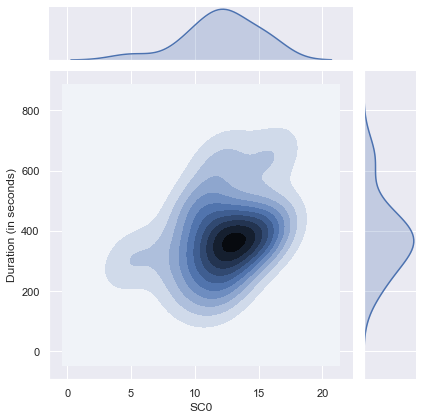

In [259]:
sns.jointplot(x="SC0", y="Duration (in seconds)", data=Result,kind="kde");
# Slightly directly correlated 0.33
# We visualize the distribution of the two characteristics 

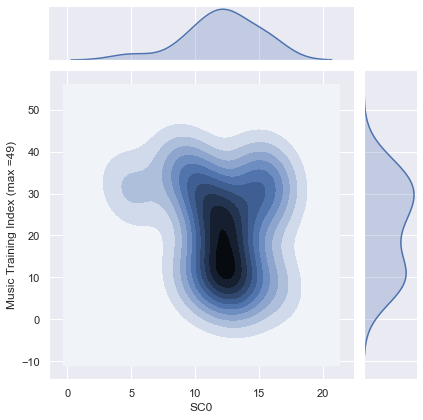

In [261]:
sns.jointplot(x="SC0", y="Music Training Index (max =49)", data=Result,kind="kde");
#Slightly inversely correlated -0.19

# And also to compare and visualize a negatively correlated (but maybe not even significant) outcome
# we can see the  the score and the music training index

We search for two sub groups in the studied population, to do this we use k means. We found two centroids. Both have a value of 12 regarding the score, but one of this centroids takes a lot more time to answer the questions. 
This could indicate that we sould separate the population in two groups and further analyze the inner dinamics of each. 

[[ 12.08333333 329.66666667]
 [ 12.25       555.75      ]]


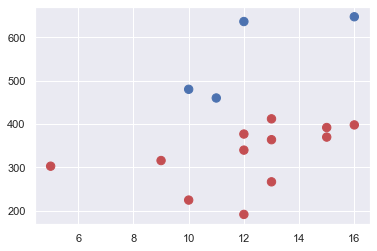

In [381]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Data = Result
  
df = DataFrame(Data,columns=['SC0','Duration (in seconds)'])
  
kmeans = KMeans(n_clusters=2).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
#--------------------- Colors
c=[]
for i in kmeans.labels_:
    if i:
        c.append('b')
    else:
        c.append('r')
    #---------------------

plt.scatter(df['SC0'], df['Duration (in seconds)'], c= c, s=70, alpha=1)
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100)

In [385]:
FGroup = Result[kmeans.labels_>0] # First group 
FGroup.corr()
# This first group gets a correlation of 
# --------             0.782 between Duration of the test and score. --------------------------

,SC0,Duration (in seconds),Music Training Index (max =49),Age
SC0,1.000000,0.780263,-0.880318,0.351517
Duration (in seconds),0.780263,1.000000,-0.935827,0.374921
Music Training Index (max =49),-0.880318,-0.935827,1.000000,-0.611525
Age,0.351517,0.374921,-0.611525,1.000000


In [386]:
FGroup # The first group is the one where the duration of the test and the score have higher correlation

,SC0,Duration (in seconds),Q3,Music Training Index (max =49),Age,Gender
Student,,,,,,
s1057570,16,647,"I know how it sounds, but I do not know how it...",9,23,Male
s4805542,10,480,I am able to create sounds on a synthesizer,34,20,Male
s4490703,11,460,"I know how it sounds, but I do not know how it...",27,24,Male
s4332199,12,636,"I know how it sounds, but I do not know how it...",14,24,Female


In [384]:
SGroup = Result[kmeans.labels_<1] # Second group 
SGroup.corr() # It gets a correlation of 0.45 between Duration of the experiment and Score.


,SC0,Duration (in seconds),Music Training Index (max =49),Age
SC0,1.000000,0.458830,-0.014533,0.144193
Duration (in seconds),0.458830,1.000000,0.103300,0.405166
Music Training Index (max =49),-0.014533,0.103300,1.000000,-0.411375
Age,0.144193,0.405166,-0.411375,1.000000


In [387]:
SGroup

,SC0,Duration (in seconds),Q3,Music Training Index (max =49),Age,Gender
Student,,,,,,
s4603478,5,303,"I know how it sounds, but I do not know how it...",31,22,Female
s1042459,15,392,"I know how it sounds, but I do not know how it...",32,21,Female
s1047701,9,316,I have made music with a synthesizer before,36,22,Female
s4715098,10,225,"I know how it sounds, but I do not know how it...",9,21,Male
s4349792,12,192,I do not know what a synthesizer is,20,25,Male
s1019474,12,377,I do not know what a synthesizer is,9,28,Male
u179070,13,412,I have made music with a synthesizer before,9,63,Male
s1028966,13,267,"I know how it works, but I cannot use/play it",22,22,Female
s4607112,15,370,"I know how it works, but I cannot use/play it",28,23,Male
